In [1]:
%matplotlib inline

import sys
sys.path.append("..") # This allows for importing from other directories above
# Our imports
from models.adaboost_mh import AdaBoostMH
from models.weak_learner import stump_base as weak_clf
from models.weak_learner import stump_base_no_vote as weak_clf_vanilla
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt


# Load the data
switch = 0
if switch == 0:
    X_train = np.load('../data/pendigits/train_data.npy')
    y_train = np.load('../data/pendigits/train_labels.npy')
    X_test = np.load('../data/pendigits/test_data.npy')
    y_test = np.load('../data/pendigits/test_labels.npy')
    k = 10
elif switch == 1:
    X_train = np.load('../data/synth/single/ten/train_data.npy')
    y_train = np.load('../data/synth/single/ten/train_labels.npy')
    X_test = np.load('../data/synth/single/ten/test_data.npy')
    y_test = np.load('../data/synth/single/ten/test_labels.npy')
    k = 10
elif switch == 2:
    X_train = np.load('../data/synth/single/two/train_data.npy')
    y_train = np.load('../data/synth/single/two/train_labels.npy')
    X_test = np.load('../data/synth/single/two/test_data.npy')
    y_test = np.load('../data/synth/single/two/test_labels.npy')
    k = 2
elif switch == 3:
    X_train = np.load('../data/synth/single/three/train_data.npy')
    y_train = np.load('../data/synth/single/three/train_labels.npy')
    X_test = np.load('../data/synth/single/three/test_data.npy')
    y_test = np.load('../data/synth/single/three/test_labels.npy')
    k = 3
elif switch == 4:
    X_train = np.load('../data/synth/single/four/train_data.npy')
    y_train = np.load('../data/synth/single/four/train_labels.npy')
    X_test = np.load('../data/synth/single/four/test_data.npy')
    y_test = np.load('../data/synth/single/four/test_labels.npy')
    k = 4
elif switch == 5:
    X_train = np.load('../data/synth/single/half/train_data.npy')
    y_train = np.load('../data/synth/single/half/train_labels.npy')
    X_test = np.load('../data/synth/single/half/test_data.npy')
    y_test = np.load('../data/synth/single/half/test_labels.npy')
    k = 2
elif switch == 6:
    X_train = np.load('../data/synth/multi/incr/train_data.npy')
    y_train = np.load('../data/synth/multi/incr/train_labels.npy')
    X_test = np.load('../data/synth/multi/incr/test_data.npy')
    y_test = np.load('../data/synth/multi/incr/test_labels.npy')
    k = 4
else:
    X_train = np.load('../data/synth/multi/alt/train_data.npy')
    y_train = np.load('../data/synth/multi/alt/train_labels.npy')
    X_test = np.load('../data/synth/multi/alt/test_data.npy')
    y_test = np.load('../data/synth/multi/alt/test_labels.npy')
    k = 4
    
    
#y_train = y_train[0:50]
#X_train = X_train[0:50]

# Initialize model 
model = AdaBoostMH(X_train, y_train, X_test, y_test, 0.99)

In [2]:
T = 300
verbose = 0

In [3]:
factorized_err_tr, factorized_err_te, factorized_gams, v_ts, factorized_d_ts = model.run_factorized(T, weak_clf, 'unif', verbose)

In [4]:
vanilla_err_tr, vanilla_err_te, vanilla_gams, vanilla_d_ts = model.run_one_against_all(T, weak_clf_vanilla, 'unif', verbose)

KeyboardInterrupt: 

## Plot training and test error

In [11]:
# Function for plotting Pseudo weights on same plot for two datasets
def make_plot(vanilla_data, factorized_data, T, ylabel, xlabel, title):
    ts = np.linspace(1, T, num=T)
    plt.plot(ts, vanilla_data, label='One-Against-All')
    plt.plot(ts, factorized_data, label='Factorized')
    plt.legend(loc='best', fontsize=11)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.xlabel(xlabel, fontsize=22)
    plt.ylabel(ylabel, fontsize=22)
    plt.title(title, fontsize=22)
    plt.savefig('training_error_pen_digits.eps')

In [12]:
vanilla_err_tr, factorized_err_tr = np.load("one_against_all_pen_digits_tr.npy"), np.load("factorized_pen_digits_tr.npy")

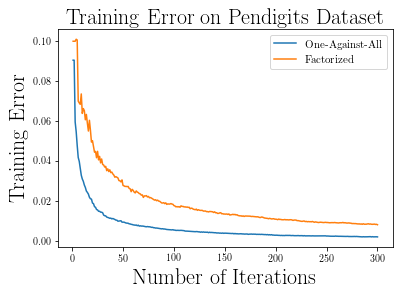

In [13]:
make_plot(vanilla_err_tr, factorized_err_tr, T, "Training Error", "Number of Iterations", "Training Error on Pendigits Dataset")

In [ ]:
make_plot(vanilla_err_te, factorized_err_te, T, "Test Error", "Number of Iterations", "Test Error on Pendigits Dataset")

In [ ]:
make_plot(vanilla_gams, factorized_gams, T, "Edge", "Number of Iterations", "Gammmas on Pendigits Dataset")

In [8]:
np.save("one_against_all_pen_digits_tr", vanilla_err_tr)
np.save("one_against_all_pen_digits_te", vanilla_err_te)
np.save("factorized_pen_digits_tr", factorized_err_tr)
np.save("factorized_pen_digits_te", factorized_err_te)